In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# upload data
orders = pd.read_csv('../data/raw/orders.csv')
products = pd.read_csv('../data/raw/products.csv')
order_products_prior = pd.read_csv('../data/raw/order_products__prior.csv')
aisles = pd.read_csv('../data/raw/aisles.csv')
departments = pd.read_csv('../data/raw/departments.csv')

## Analyze of the number of orders and clients

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
print(f'number of rows:', orders.shape[0])

number of rows: 3421083


In [5]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Around 200k lines on 3.4M  with missing values on 'days_since_prior_order' => assuming it means it's the first order of the user ?

In [6]:
user_order_counts = orders.user_id.value_counts()
print(f"total client number : {user_order_counts.shape[0]}")
print(f'average number of orders per client : {user_order_counts.mean():.2f}')
print(f'Min number of orders per client: {user_order_counts.min()}')
print(f'Max number of orders per client: {user_order_counts.max()}')

total client number : 206209
average number of orders per client : 16.59
Min number of orders per client: 4
Max number of orders per client: 100


We find again 206209 different user_id so the hypothesis of value missing on 'days_since_prior_order' is correct.
We also see we have in between 4 and 100 commands per client in the database

Text(0.5, 1.0, 'Distribution of number of orders per client')

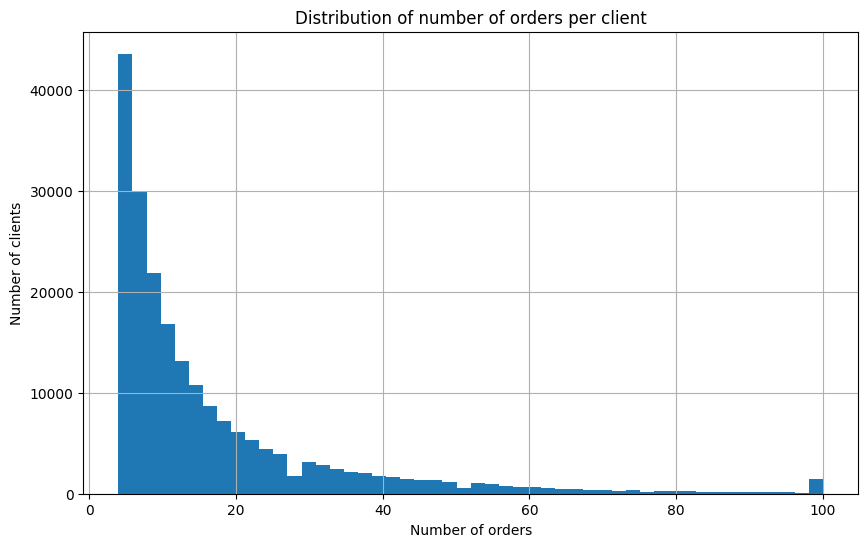

In [7]:
plt.figure(figsize=(10, 6))
user_order_counts.hist(bins=50)
plt.xlabel('Number of orders')
plt.ylabel('Number of clients')
plt.title('Distribution of number of orders per client')

Text(0.5, 1.0, 'Distribution of orders by hour of the day')

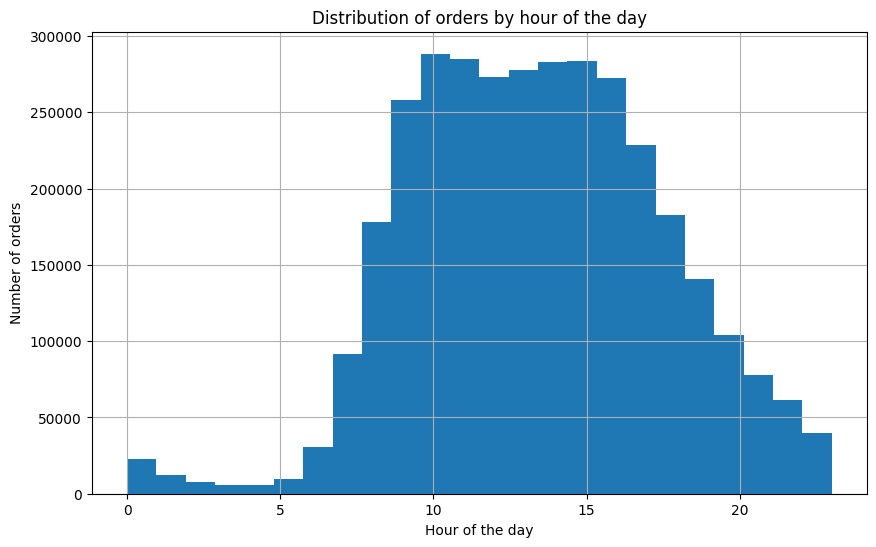

In [8]:
plt.figure(figsize=(10, 6))
orders.order_hour_of_day.hist(bins=24)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.title('Distribution of orders by hour of the day')

In [9]:
dow_distribution = orders.order_dow.value_counts().sort_index()
print(dow_distribution)

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: count, dtype: int64


<Axes: xlabel='order_dow'>

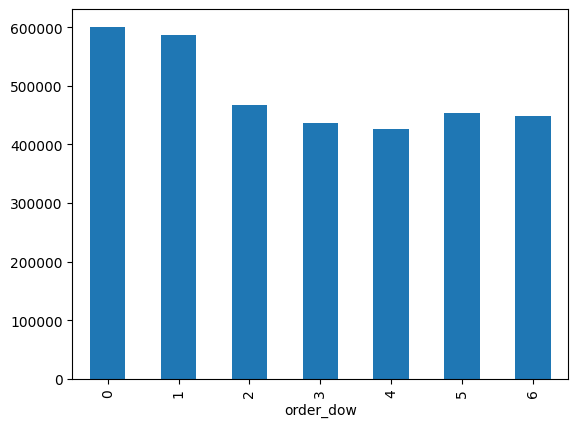

In [10]:
dow_distribution.plot(kind='bar')

## Analyse of the products, aisles and departments datasets

In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
products.value_counts()

product_id  product_name                                                       aisle_id  department_id
1           Chocolate Sandwich Cookies                                         61        19               1
2           All-Seasons Salt                                                   104       13               1
3           Robust Golden Unsweetened Oolong Tea                               94        7                1
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce  38        1                1
5           Green Chile Anytime Sauce                                          5         13               1
                                                                                                         ..
49684       Vodka, Triple Distilled, Twist of Vanilla                          124       5                1
49685       En Croute Roast Hazelnut Cranberry                                 42        1                1
49686       Artisan Baguette     

In [13]:
products.aisle_id.value_counts()

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: count, Length: 134, dtype: int64

In [14]:
products.department_id.value_counts()

department_id
11    6563
19    6264
13    5371
7     4365
1     4007
16    3449
17    3085
15    2092
9     1858
4     1684
3     1516
20    1322
21    1258
6     1139
14    1115
18    1081
5     1054
8      972
12     907
2      548
10      38
Name: count, dtype: int64

In [15]:
aisles.value_counts()

aisle_id  aisle                     
1         prepared soups salads         1
2         specialty cheeses             1
3         energy granola bars           1
4         instant foods                 1
5         marinades meat preparation    1
                                       ..
130       hot cereal pancake mixes      1
131       dry pasta                     1
132       beauty                        1
133       muscles joints pain relief    1
134       specialty wines champagnes    1
Name: count, Length: 134, dtype: int64

In [16]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [17]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
departments.value_counts()

department_id  department     
1              frozen             1
2              other              1
3              bakery             1
4              produce            1
5              alcohol            1
6              international      1
7              beverages          1
8              pets               1
9              dry goods pasta    1
10             bulk               1
11             personal care      1
12             meat seafood       1
13             pantry             1
14             breakfast          1
15             canned goods       1
16             dairy eggs         1
17             household          1
18             babies             1
19             snacks             1
20             deli               1
21             missing            1
Name: count, dtype: int64

There are almost 50 000 products in scope
The products are organised into 21 departments and 134 aisles


In [19]:
# We're going to merge products, aisles and departments to understand their relationships

products_position=products.merge(aisles, on='aisle_id').merge(departments, on='department_id')
products_position.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [20]:
aisles_per_department=products_position.groupby(['department_id']).aisle_id.nunique().reset_index()
aisles_per_department.head(21)

,department_id,aisle_id
0,1,11
1,2,1
2,3,5
3,4,5
4,5,5
5,6,4
6,7,8
7,8,2
8,9,5
9,10,2


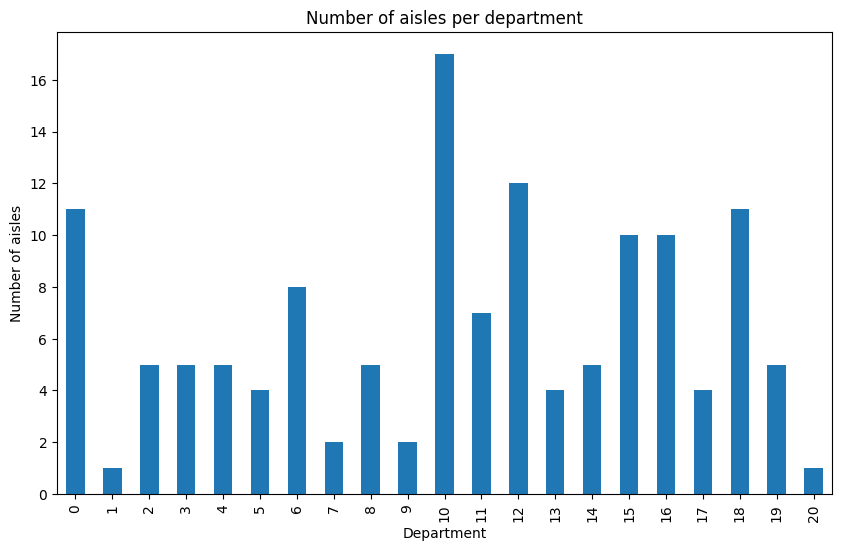

In [21]:
plt.figure(figsize=(10, 6))
aisles_per_department.aisle_id.plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Number of aisles')
plt.title('Number of aisles per department')
plt.show()

In [22]:
products_per_aisles=products_position.groupby(['aisle_id']).product_id.nunique().reset_index()
products_per_aisles.head(134)

,aisle_id,product_id
0,1,146
1,2,271
2,3,832
3,4,543
4,5,409
...,...,...
129,130,303
130,131,457
131,132,178
132,133,172


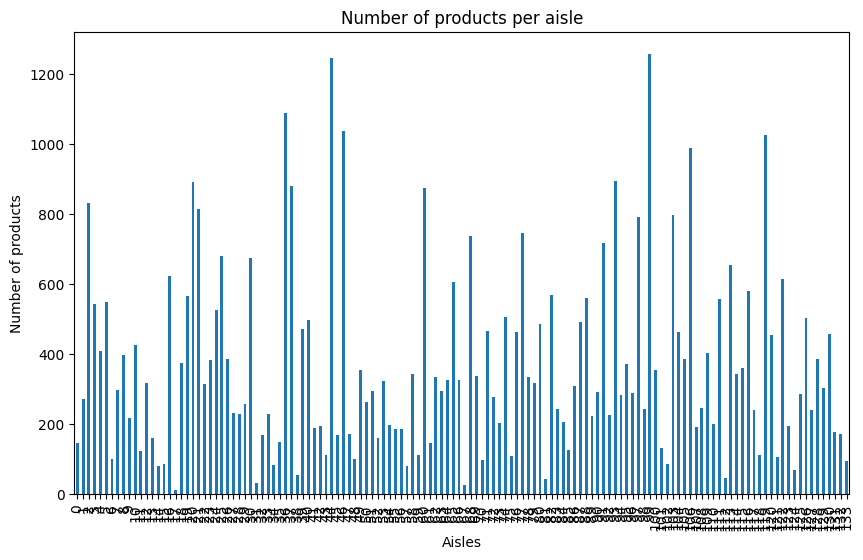

In [23]:
plt.figure(figsize=(10, 6))
products_per_aisles.product_id.plot(kind='bar')
plt.xlabel('Aisles')
plt.ylabel('Number of products')
plt.title('Number of products per aisle')
plt.show()

## Analyse of order_products dataset & bundles

In [24]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [25]:
#group by order_id to get the number of products in each order

basket_size=order_products_prior.groupby('order_id')['product_id'].count()
basket_size.head()

order_id
2     9
3     8
4    13
5    26
6     3
Name: product_id, dtype: int64

In [26]:
print(f"Statistics on basket sizes: ")
print(f"Average basket size: {basket_size.mean():.2f}")
print(f"Median basket size: ", basket_size.median())
print(f"Maximum basket size: ", basket_size.max())
print(f"Minimum basket size: ", basket_size.min())


Statistics on basket sizes: 
Average basket size: 10.09
Median basket size:  8.0
Maximum basket size:  145
Minimum basket size:  1


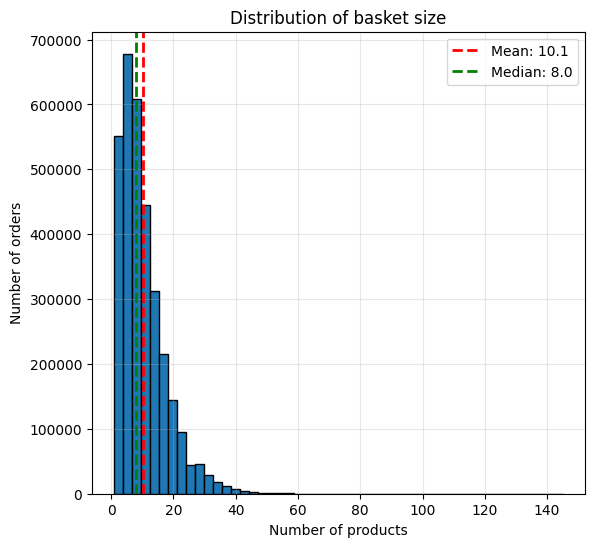

In [27]:
plt.figure(figsize=(14, 6))

# Subplot 1: Histogramme classique
plt.subplot(1, 2, 1)
plt.hist(basket_size, bins=50, edgecolor='black')
plt.xlabel('Number of products')
plt.ylabel('Number of orders')
plt.title('Distribution of basket size')
plt.axvline(basket_size.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {basket_size.mean():.1f}')
plt.axvline(basket_size.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {basket_size.median():.1f}')
plt.legend()
plt.grid(True, alpha=0.3)

We have a right-skewed distribution. The majority of the baskets are small. 

Let's check the products that are ordered the most frequently :

In [29]:
# first we merge order_products with products to get the product name of the second table
# products_purchased=order_products_prior.merge(products[['product_id', 'product_name']], on='product_id')

# then we count the number of times each product has been purchased
# top_products=products_purchased[['product_name', 'product_id']].value_counts().head(20).sort_values(ascending=False)
# print(top_products)

Number of orders per department :

In [ ]:
dept_counts = order_products_prior.merge(products[['product_id', 'department_id']], on='product_id')['department_id'].value_counts()

print(dept_counts)

department_id
4     9479291
16    5414016
19    2887550
7     2690129
1     2236432
13    1875577
3     1176787
15    1068058
20    1051249
9      866627
17     738666
14     709569
12     708931
11     447123
18     423802
6      269253
5      153696
8       97724
21      69145
2       36291
10      34573
Name: count, dtype: int64


Let's check the products that are the most often reordered :

In [31]:
products_reordered=order_products_prior.merge(products, on='product_id')

In [32]:
reorder_by_product=products_reordered.groupby('product_name')['reordered'].agg(['mean','count'])
reorder_by_product = reorder_by_product[reorder_by_product['count'] > 1000] # more than 1000 orders
top_reordered=reorder_by_product.sort_values(by='mean', ascending=False)
top_reordered.head(20)

,mean,count
product_name,,
Half And Half Ultra Pasteurized,0.861691,2921
Whole Organic Omega 3 Milk,0.860233,9108
Organic Lactose Free Whole Milk,0.859030,8477
Organic Homogenized Whole Milk,0.857683,3970
Ultra-Purified Water,0.857623,1489
"Milk, Organic, Vitamin D",0.854342,20198
Organic Reduced Fat Milk,0.850686,35663
Goat Milk,0.849952,5185
Banana,0.843501,472565
